# Simple gravity network

Consider the simple gravity network represented in the figure below:

<img src='grav_net/grav_net.jpg', width=700>

This network is formed by 6 nodes and 5 connections. The nodes represent points on the Earth's surface. Consider that, at each node $i$, $i = 0, \dots, 5$, there is a gravity value $g_{i}$. Moreover, consider that the gravity values at the nodes $0$ and $5$ are known and that, on each connection (dashed lines), there is a differential gravity measurement $\ell_{ij}$ defined by:

$$
\ell_{ij} = g_{j} - g_{i} \: , \quad j \ne i \: ,
$$

where $g_{j}$ and $g_{i}$ are, respectively, the gravity values at positions $j$ and $i$. For convenience, let's call $g_{i}$ the **start station** and $g_{j}$ the **end station** associated with the differential gravity measurement $\ell_{ij}$.

In this case, we have the following equations for the differential gravity measurements:

$$
\begin{split}
\ell_{01} &= g_{1} - g_{0} \\
\ell_{12} &= g_{2} - g_{1} \\
\ell_{25} &= g_{5} - g_{2} \\
\ell_{34} &= g_{4} - g_{3} \\
\ell_{23} &= g_{3} - g_{2}
\end{split} \: ,
$$

and the following equations for the known gravity values:

$$
\begin{split}
g_{0} &= \tilde{g}_{0} \\
g_{5} &= \tilde{g}_{5}
\end{split} \: ,
$$

where $\tilde{g}_{0}$ and $\tilde{g}_{5}$ represent, respectively, the known gravity values at the nodes $0$ and $5$.

Notice that, by defining a vector $\mathbf{g}$ containing the gravity values at each node, e.g.,

$$
\mathbf{g} = \left[ \begin{array}{c}
g_{0} \\
g_{1} \\
g_{2} \\
g_{3} \\
g_{4} \\
g_{5}
\end{array} \right] \: ,
$$

and another vector $\mathbf{d}$ defined as follows:

$$
\mathbf{d} = \left[ \begin{array}{c}
\ell_{01} \\
\ell_{12} \\
\ell_{25} \\
\ell_{34} \\
\ell_{23} \\
\tilde{g}_{0} \\
\tilde{g}_{5}
\end{array} \right] \: ,
$$

it is possible to estimate the gravity values at all nodes by solving a linear system $\mathbf{A} \, \mathbf{g} = \mathbf{d}$.

### Exercise

1. In your `my_functions.py` file, create a function that defines the matrix $\mathbf{A}$. The function must receive three arguments: an 1D array or list containing the indices of the start stations, an 1D array or list containing the indices of the end stations
Simulate the simple gravity network represented above. First, simulate the parameter vector $\mathbf{g}$ containing the gravity values at all nodes.

2. Create the matrix $\mathbf{A}$ and the data vector $\mathbf{d}$.

3. Create a function `grav_net` that receives $\mathbf{A}$ and $\mathbf{d}$ and returns the estimated parameter vector $\mathbf{g}$ by applying the Least Squares Estimator. Use your previously implemented functions for calculating any matrix operation and/or solving any linear system.

4. Use the `code-template.ipynb` and compare the estimated parameter vector with the simulated parameter vector by using the routine  `numpy.allclose`.

#### Simulating a simple gravity network

The cell below uses the routine [`numpy.random.normal`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.normal.html) for simulating the parameter vector containing the gravity values at all nodes of our simple gravity network.

In [1]:
import numpy as np
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt

In [2]:
def triangles_area(nodes, vertices):
    areas = []
    for v0, v1, v2 in nodes[vertices]:
        v01 = v1 - v0
        v02 = v2 - v0
        # compute the area of the triangle
        areas.append(np.cross(v01, v02))
    areas = np.array(areas)
    return areas

In [3]:
# gravity reference value in mGal
g0 = 979000.0

# gravity variation in mGal
delta_g = 200.0

# number of nodes
N = 15

# true gravity values
g = g0 + np.random.normal(loc=0., scale=delta_g, size=N)

# station labels
stations_ID = np.arange(N)

In [4]:
# coordinates (in degrees)
longitude = -49. - 5*np.random.rand(N)
latitude = -23. - 4*np.random.rand(N)

In [5]:
# nodes
nodes = np.vstack([longitude, latitude]).T

# connections os the network
triangles = Delaunay(nodes)

In [6]:
areas = triangles_area(nodes, triangles.vertices)
cutoff_min = np.min(areas) + 0.1*(np.max(areas) - np.min(areas))
cutoff_max = np.max(areas) - 0.1*(np.max(areas) - np.min(areas))

In [7]:
mask = (areas > cutoff_min) & (areas < cutoff_max)

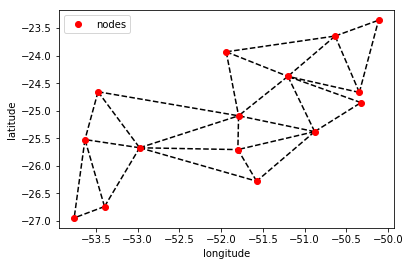

In [9]:
plt.close('all')
plt.figure()
plt.triplot(nodes[:,0], nodes[:,1], triangles.simplices[mask], 'k--')
plt.plot(nodes[:,0], nodes[:,1], 'ro', label='nodes')
plt.legend(loc = 'best')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()